# Project Summary
Mainly plots that summarize the different model performances.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
data = pd.read_csv('../data/glicko.csv')

In [3]:
from joblib import load 
model = load('../optimized_model.pkl')

In [4]:
features = ['elo_sum', 'elo_diff', 'elo_asym', 'elo_prob1', 'glicko_prob']
target = ['outcome']

In [5]:
data['model_prob'] = model.predict_proba(data[features].values)[:,1]

In [6]:
def brier(row, var='elo_prob1'):
    return 25 - 100 * (row['outcome'] - row[var])**2

In [7]:
data['brier_elo'] = data.apply(lambda x: brier(x, var='elo_prob1'), axis=1)

In [8]:
data['brier_glicko'] = data.apply(lambda x: brier(x, var='glicko_prob'), axis=1)

In [9]:
data['brier_model'] = data.apply(lambda x: brier(x, var='model_prob'), axis=1)

In [10]:
data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.week

In [11]:
#results = data.groupby(['season', 'week']).agg({
#    'brier_elo':np.sum,
#    'brier_glicko':np.sum,
#    'brier_model':np.sum
#}).reset_index()

results = data.groupby(['date', 'season']).agg({
    'brier_elo':np.sum,
    'brier_glicko':np.sum,
    'brier_model':np.sum
}).reset_index()

In [12]:
def plot_season(results, season=2017):
    """ Plot a season of data. """
    data = results[results['season'] == season]
    
    plt.figure(figsize=(16,9))
    plt.plot(data['date'], data['brier_elo'], label='ELO ({0:4.2f})'.format(np.sum(data['brier_elo'])))
    plt.plot(data['date'], data['brier_glicko'], label='Glicko ({0:4.2f})'.format(np.sum(data['brier_glicko'])))
    plt.plot(data['date'], data['brier_model'], label='Model ({0:4.2f})'.format(np.sum(data['brier_model'])))
    plt.grid(alpha=0.2)
    plt.legend(frameon=False)

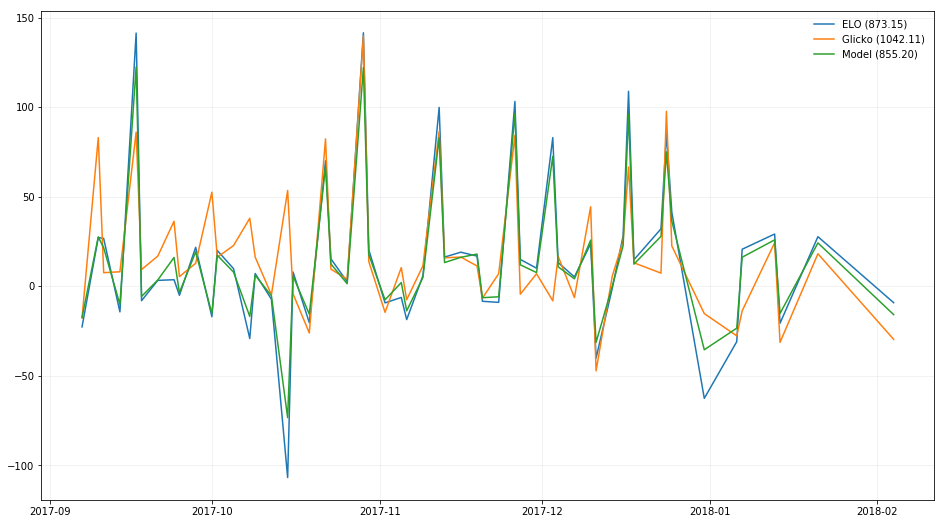

In [17]:
plot_season(results, 2017)